# Machine Learning Model Serving

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
start = time.time()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
def save_obj(obj, name ):
    with open('web/'+ name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [5]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [6]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nick Heidfeld,12374,0,0,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Robert Kubica,9242,0,0,0,0
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,10812,0,0,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11176,0,0,0,0
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11533,0,0,0,1


In [7]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [8]:
print(driver_confidence.dtypes)

float64


In [9]:
driver_confidence

driver
Adrian Sutil          0.868421
Alexander Albon       0.972973
Alexander Rossi       1.000000
André Lotterer        1.000000
Antonio Giovinazzi    0.910714
                        ...   
Valtteri Bottas       0.959770
Vitaly Petrov         0.879310
Vitantonio Liuzzi     0.783784
Will Stevens          1.000000
Yuki Tsunoda          1.000000
Name: driver_dnf, Length: 72, dtype: float64

In [10]:
driver_confidence_dict_str = {}
for key , value in driver_confidence_dict.items():
    # Correct for New Drivers
    if value == 1.0:
        value = 0.10
    driver_confidence_dict_str[key] = np. array([value])
    print ("%s: %s" % (key, value))
    
save_obj(driver_confidence_dict_str, 'driver_dict' )

Adrian Sutil: 0.868421052631579
Alexander Albon: 0.972972972972973
Alexander Rossi: 0.1
André Lotterer: 0.1
Antonio Giovinazzi: 0.9107142857142857
Brendon Hartley: 0.88
Bruno Senna: 0.8260869565217391
Carlos Sainz: 0.9111111111111111
Charles Leclerc: 0.868421052631579
Charles Pic: 0.9487179487179487
Christian Klien: 0.1
Daniel Ricciardo: 0.9509803921568627
Daniil Kvyat: 0.9196428571428571
Esteban Gutiérrez: 0.847457627118644
Esteban Ocon: 0.9397590361445783
Felipe Massa: 0.9161290322580645
Felipe Nasr: 0.925
Fernando Alonso: 0.9315789473684211
George Russell: 0.9272727272727272
Giedo van der Garde: 0.8421052631578947
Heikki Kovalainen: 0.95
Jack Aitken: 0.1
Jaime Alguersuari: 0.9210526315789473
Jarno Trulli: 0.972972972972973
Jean-Éric Vergne: 0.9137931034482758
Jenson Button: 0.9407407407407408
Jolyon Palmer: 0.8571428571428572
Jules Bianchi: 0.9117647058823529
Jérôme d'Ambrosio: 0.95
Kamui Kobayashi: 0.8356164383561644
Karun Chandhok: 0.8181818181818181
Kevin Magnussen: 0.93277310924

In [11]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [12]:
type(constructor_reliability)

pandas.core.series.Series

In [13]:
constructor_reliability

constructor
Alfa Romeo        0.419565
AlphaTauri        0.475054
Alpine F1         0.534783
Aston Martin      0.611231
Caterham          0.178571
Ferrari           0.877155
HRT               0.156522
Haas F1 Team      0.347639
Lotus             0.078947
Manor Marussia    0.121212
Marussia          0.166667
McLaren           0.613883
Mercedes          0.887689
Red Bull          0.835498
Virgin            0.092105
Williams          0.483801
Name: constructor_dnf, dtype: float64

In [14]:
constructor_reliability_dict_str = {}
for key , value in constructor_reliability_dict.items():
    # Correct value 
    constructor_reliability_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))
    
save_obj(constructor_reliability_dict_str, 'constructor_dict' )

## Análisis de la probabilidad de los equipos y pilotos de F1 después de la última carrera

In [15]:
data2021 = pd.read_csv('./data_f1/data_filtered_2021.csv')

In [16]:
data2021=data2021.sort_values(by='date')
races = data2021['GP_name'].unique().tolist()
print(races)

['Bahrain International Circuit', 'Autodromo Enzo e Dino Ferrari', 'Autódromo Internacional do Algarve', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Baku City Circuit', 'Circuit Paul Ricard', 'Red Bull Ring', 'Silverstone Circuit', 'Hungaroring', 'Circuit de Spa-Francorchamps', 'Circuit Park Zandvoort', 'Autodromo Nazionale di Monza', 'Sochi Autodrom', 'Istanbul Park', 'Circuit of the Americas']


In [17]:
drivers = data2021['driver'].unique().tolist()
print(drivers)

['George Russell', 'Pierre Gasly', 'Nikita Mazepin', 'Mick Schumacher', 'Antonio Giovinazzi', 'Kimi Räikkönen', 'Lance Stroll', 'Sebastian Vettel', 'Max Verstappen', 'Sergio Pérez', 'Yuki Tsunoda', 'Lewis Hamilton', 'Esteban Ocon', 'Fernando Alonso', 'Charles Leclerc', 'Carlos Sainz', 'Lando Norris', 'Daniel Ricciardo', 'Nicholas Latifi', 'Valtteri Bottas', 'Robert Kubica']


In [18]:
constructors = data2021['constructor'].unique().tolist()
print(constructors)

['Williams', 'AlphaTauri', 'Haas F1 Team', 'Alfa Romeo', 'Aston Martin', 'Red Bull', 'Mercedes', 'Alpine F1', 'Ferrari', 'McLaren']


In [19]:
results = {'race': [],
          'driver':[],
          'constructor':[],
          'points':[]}
for race in races:
    for driver in drivers:
        clst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['constructor'].unique().tolist()
        plst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['points'].unique().tolist()
        for c in clst:
            for p in plst:
                results['race'].append(race)
                results['driver'].append(driver)
                results['constructor'].append(c)
                results['points'].append(p)


In [20]:
df2021= pd.DataFrame(results)
df2021

,race,driver,constructor,points
0,Bahrain International Circuit,George Russell,Williams,0.0
1,Bahrain International Circuit,Pierre Gasly,AlphaTauri,0.0
2,Bahrain International Circuit,Nikita Mazepin,Haas F1 Team,0.0
3,Bahrain International Circuit,Mick Schumacher,Haas F1 Team,0.0
4,Bahrain International Circuit,Antonio Giovinazzi,Alfa Romeo,0.0
...,...,...,...,...
326,Circuit of the Americas,Carlos Sainz,Ferrari,6.0
327,Circuit of the Americas,Lando Norris,McLaren,4.0
328,Circuit of the Americas,Daniel Ricciardo,McLaren,10.0
329,Circuit of the Americas,Nicholas Latifi,Williams,0.0


In [21]:
print(f'Number of Races done: {len(races)}')

Number of Races done: 16


In [22]:
pts_by_driver = df2021.groupby('driver').sum()['points']
driver_race = df2021.groupby('driver').count()['race']
driver_points_ratio = (pts_by_driver/len(races)/25.0)
driver_points_dict = dict(zip(driver_points_ratio.index,driver_points_ratio))

In [23]:
driver_points_dict

{'Antonio Giovinazzi': 0.0025,
 'Carlos Sainz': 0.30625,
 'Charles Leclerc': 0.32,
 'Daniel Ricciardo': 0.2625,
 'Esteban Ocon': 0.115,
 'Fernando Alonso': 0.145,
 'George Russell': 0.04,
 'Kimi Räikkönen': 0.015,
 'Lance Stroll': 0.065,
 'Lando Norris': 0.3725,
 'Lewis Hamilton': 0.68875,
 'Max Verstappen': 0.71875,
 'Mick Schumacher': 0.0,
 'Nicholas Latifi': 0.0175,
 'Nikita Mazepin': 0.0,
 'Pierre Gasly': 0.185,
 'Robert Kubica': 0.0,
 'Sebastian Vettel': 0.09,
 'Sergio Pérez': 0.375,
 'Valtteri Bottas': 0.4625,
 'Yuki Tsunoda': 0.05}

In [24]:
pts_by_constructor = df2021.groupby('constructor').sum()['points']
constructor_race = df2021.groupby('constructor').count()['race']
constructor_pts_ratio = (pts_by_constructor/len(races)/(25.0+18.0))
constructor_points_dict = dict(zip(constructor_pts_ratio.index,constructor_pts_ratio))
#constructor_points_dict = dict(zip(pts_by_constructor.index,pts_by_constructor))

In [25]:
constructor_points_dict

{'Alfa Romeo': 0.010174418604651164,
 'AlphaTauri': 0.13662790697674418,
 'Alpine F1': 0.1511627906976744,
 'Aston Martin': 0.09011627906976744,
 'Ferrari': 0.3640988372093023,
 'Haas F1 Team': 0.0,
 'McLaren': 0.3691860465116279,
 'Mercedes': 0.6693313953488372,
 'Red Bull': 0.6359011627906976,
 'Williams': 0.03343023255813953}

In [26]:
driver_pred_dict_str = {}
for key , value in driver_points_dict.items():
    driver_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [27]:
save_obj(driver_pred_dict_str, 'driver_pred_dict' )

In [28]:
constructor_pred_dict_str = {}
for key , value in constructor_points_dict.items():
    constructor_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [29]:
save_obj(constructor_pred_dict_str, 'constructor_pred_dict' )

## Generar el dataset de las clasificaciones para el predictor

In [30]:
qualif = {'race': [],
          'driver':[],
          'quali_pos':[]
         }
for race in races:
    for driver in drivers:
        qlst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['quali_pos'].unique().tolist()
        for q in qlst:
            qualif['race'].append(race)
            qualif['driver'].append(driver)
            qualif['quali_pos'].append(q)


In [31]:
qualif2021= pd.DataFrame(qualif)
print(qualif2021)

                              race              driver  quali_pos
0    Bahrain International Circuit      George Russell         15
1    Bahrain International Circuit        Pierre Gasly          5
2    Bahrain International Circuit      Nikita Mazepin         19
3    Bahrain International Circuit     Mick Schumacher         18
4    Bahrain International Circuit  Antonio Giovinazzi         12
..                             ...                 ...        ...
325        Circuit of the Americas        Carlos Sainz          5
326        Circuit of the Americas        Lando Norris          7
327        Circuit of the Americas    Daniel Ricciardo          6
328        Circuit of the Americas     Nicholas Latifi         14
329        Circuit of the Americas     Valtteri Bottas          9

[330 rows x 3 columns]


In [32]:
qualif2021.to_csv('./data_f1/qualif_filtered.csv', index = False)

In [33]:
# last race
last_race = races[len(races)-1]
print(last_race)

Circuit of the Americas


In [34]:
qualif_last= qualif2021[qualif2021['race']==last_race]
print (qualif_last)

                        race              driver  quali_pos
310  Circuit of the Americas      George Russell         20
311  Circuit of the Americas        Pierre Gasly          8
312  Circuit of the Americas      Nikita Mazepin         17
313  Circuit of the Americas     Mick Schumacher         16
314  Circuit of the Americas  Antonio Giovinazzi         12
315  Circuit of the Americas      Kimi Räikkönen         15
316  Circuit of the Americas        Lance Stroll         13
317  Circuit of the Americas    Sebastian Vettel         18
318  Circuit of the Americas      Max Verstappen          1
319  Circuit of the Americas        Sergio Pérez          3
320  Circuit of the Americas        Yuki Tsunoda         10
321  Circuit of the Americas      Lewis Hamilton          2
322  Circuit of the Americas        Esteban Ocon         11
323  Circuit of the Americas     Fernando Alonso         19
324  Circuit of the Americas     Charles Leclerc          4
325  Circuit of the Americas        Carl

In [35]:
qualif_last.to_csv('./data_f1/qualif_lastrace.csv', index = False)

## Generar modelo de aprendizaje automático: Random Forest 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def save_model(model, model_filepath):
    """
    Export your model as a pickle file.
    Saves trained model as pickle file to be loaded later.
    
    """
    
    filename = model_filepath
    pickle.dump(model, open(filename, 'wb'))

In [37]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')


In [38]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [39]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,8,10,15,20]
min_samples_leaf = [1,2,4,6,8,10]
bootstrap = [True,False]

random_parms = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
                }

In [40]:
# Dataset generated in previous phase
data = pd.read_csv('./data_f1/cleaned_data.csv')

In [41]:
data.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_reliability,active_driver,active_constructor
0,Albert Park Grand Prix Circuit,12,Alpine F1,Daniel Ricciardo,12,0.950980,0.534783,1,1
1,Albert Park Grand Prix Circuit,9,Alpine F1,Carlos Sainz,9,0.911111,0.534783,1,1
2,Albert Park Grand Prix Circuit,16,Williams,Valtteri Bottas,16,0.959770,0.483801,1,1
3,Albert Park Grand Prix Circuit,15,Williams,Valtteri Bottas,10,0.959770,0.483801,1,1
4,Albert Park Grand Prix Circuit,0,Williams,Valtteri Bottas,6,0.959770,0.483801,1,1


In [42]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [43]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [44]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [45]:
x.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_reliability,active_driver,active_constructor
0,0,12,2,3,12,0.950980,0.534783,1,1
1,0,9,2,1,9,0.911111,0.534783,1,1
2,0,16,9,18,16,0.959770,0.483801,1,1
3,0,15,9,18,10,0.959770,0.483801,1,1
4,0,0,9,18,6,0.959770,0.483801,1,1


In [46]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand,param_distributions=random_parms,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rf_random.fit(X,y)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 400,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [47]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=20,min_samples_leaf=1,max_features='sqrt',max_depth=90,bootstrap=True)
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)
for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [48]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cnf_mat_rf = confusion_matrix(y_test,y_pred_rf)
cnf_mat_rf = cnf_mat_rf/cnf_mat_rf.sum()

In [49]:
# Exportar el modelo
model_filepath='./models/{}.pkl'.format('RandomForestClassifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(rf, model_filepath)

Saving model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [65]:
# Exportar el modelo
model_filepath='./web/{}.pkl'.format('RandomForestClassifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(rf, model_filepath)

Saving model ...
    MODEL: ./web/RandomForestClassifier.pkl


In [50]:
print(X.columns)

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability'],
      dtype='object')


In [51]:
importances = rf.feature_importances_
importances

array([0.01895588, 0.77304295, 0.03194846, 0.02983582, 0.06426787,
       0.08194902])

#  Análisis de Machine Learning Model Serving

In [52]:
import pickle

model_filepath='./models/{}.pkl'.format('RandomForestClassifier')

# load model using pickle l from disk
print('Loading model ...\n    MODEL: {}'.format(model_filepath))
loaded_model = pickle.load(open(model_filepath, 'rb'))
# model = joblib.load(model_filepath)


Loading model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [53]:
importances = loaded_model.feature_importances_
importances

array([0.01895588, 0.77304295, 0.03194846, 0.02983582, 0.06426787,
       0.08194902])

In [54]:
feature_names=['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability']

In [55]:
import time
import numpy as np

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


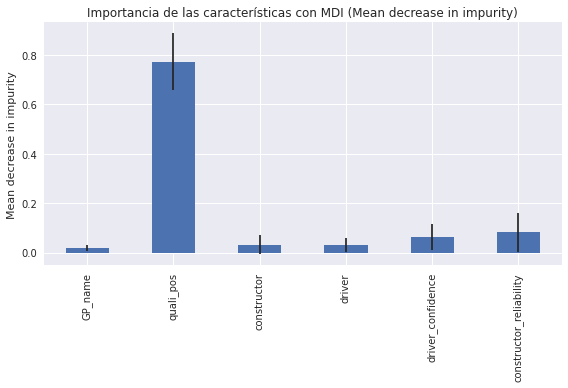

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de las características con MDI (Mean decrease in impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [57]:
len(loaded_model.estimators_)

100

### The plot of first Decision Tree:

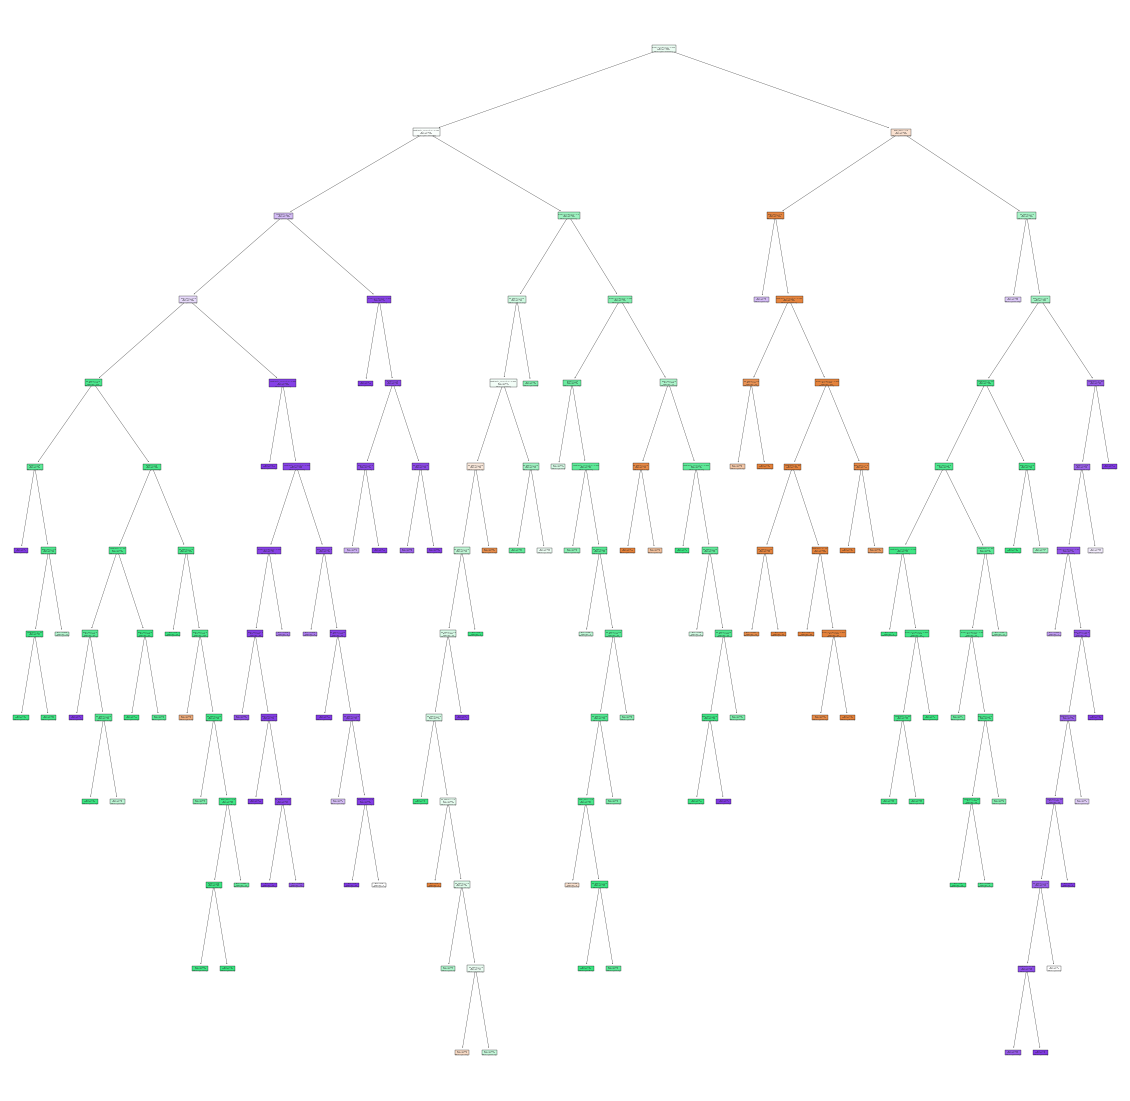

In [58]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[0], feature_names=feature_names, filled=True)

Let’s check the depth of the first tree from the Random Forest:

In [59]:
loaded_model.estimators_[0].tree_.max_depth

12

Our first tree has max_depth=14. Other trees have similar depth. You can check for the different trees.

### The plot of Second Decision Tree:

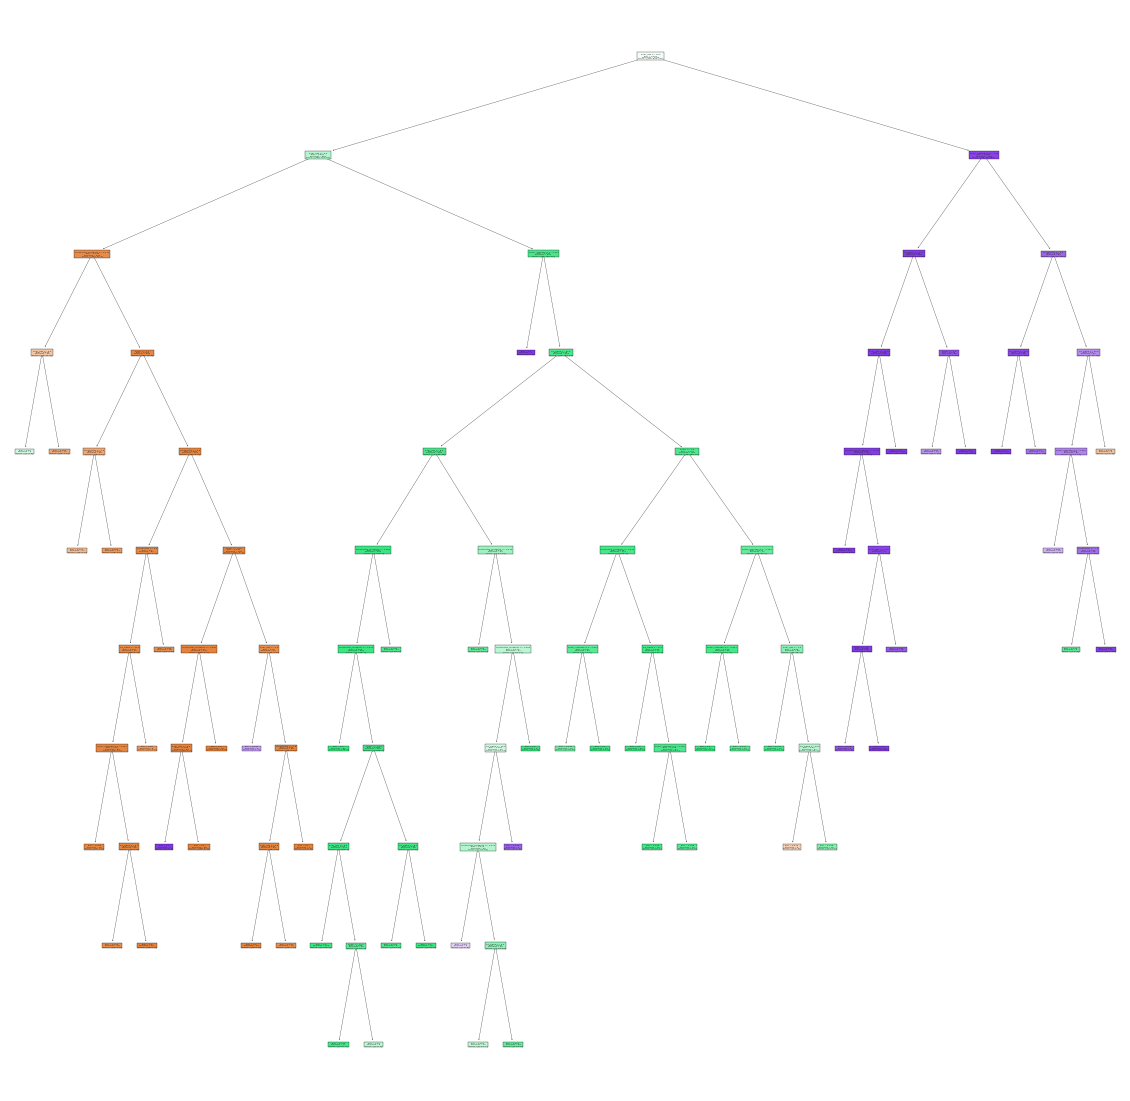

In [60]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[1], feature_names=feature_names, filled=True)

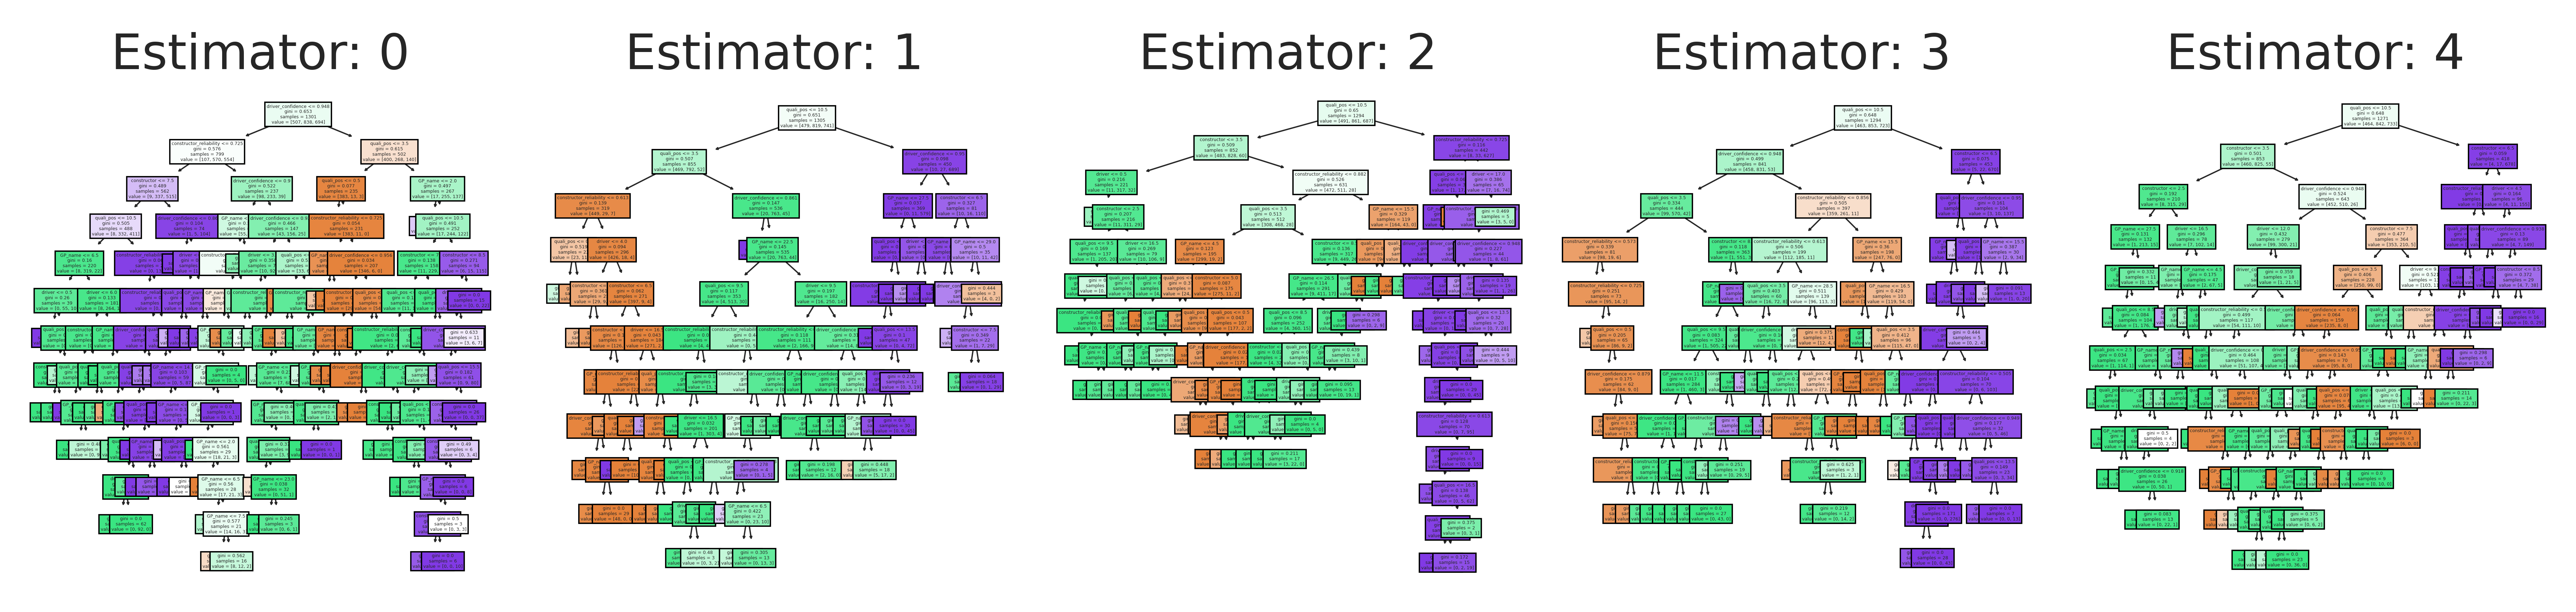

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(loaded_model.estimators_[index],
                   feature_names = feature_names, 
                   # class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)    

In [62]:
end = time.time()

In [63]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:20:31.247129'

In [64]:
print(str(end - start)+" seconds")

1231.247129201889 seconds


##  Veamos los resultados

Para ver los resultados del laboratorio, deberá iniciar el servidor web mediante Terminal.

1. En el menú de la parte superior de la página, seleccione **File->New->Terminal**.
2. Ingrese los siguientes comandos, presionando "enter" después de cada uno (siéntase libre de copiar y pegar)

        cd /home/opc/redbull_espa/web
        source /home/opc/redbullenv/bin/activate
        python3 app.py
3. Abra un navegador web a la IP pública de su Jupyter Lab, pero use el puerto 8080 en lugar del puerto **8080**

        http://xxx.xxx.xxx.xxx:8080

In [66]:
! pwd

/home/opc/redbull_espa
